In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [3]:
def plot_means(X_r,X_o):
    # Plotting min and max of each class
    d_mean_o=np.abs(X_o[ind0].mean(axis=0)-X_o[~ind0].mean(axis=0))
    d_mean_r=np.abs(X_r[ind0].mean(axis=0)-X_r[~ind0].mean(axis=0))
    plt.figure(figsize=(15,8))
    fn=np.arange(200)
    plt.plot(fn,d_mean_o,'k',label='Original Data')
    plt.plot(fn,d_mean_r,'b',label='Rotated Data')
    plt.xlabel('Feature Number');plt.ylabel('Distance of class means along the axis')
    plt.legend()


In [63]:
import feather as ftr


train = ftr.read_dataframe("../data/input/min_maxed_train.feather")
test = ftr.read_dataframe("../data/input/min_maxed_test.feather")



In [64]:
train, target = train.iloc[:, 2:], train['target']
test=test.iloc[:, 1:]

In [67]:
data=train.append(test)

In [68]:
data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

c:\users\k-higuchi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


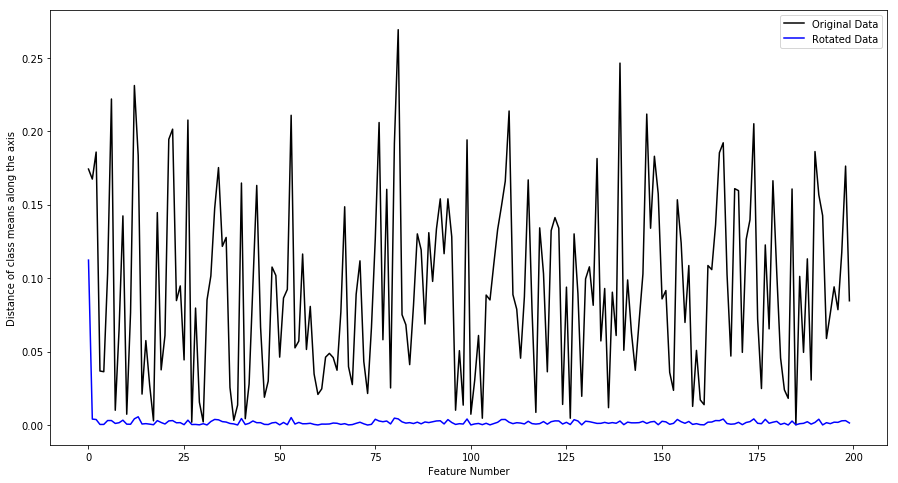

In [69]:

data_rotated=data @ R

plot_means(data_rotated,train_scaled)

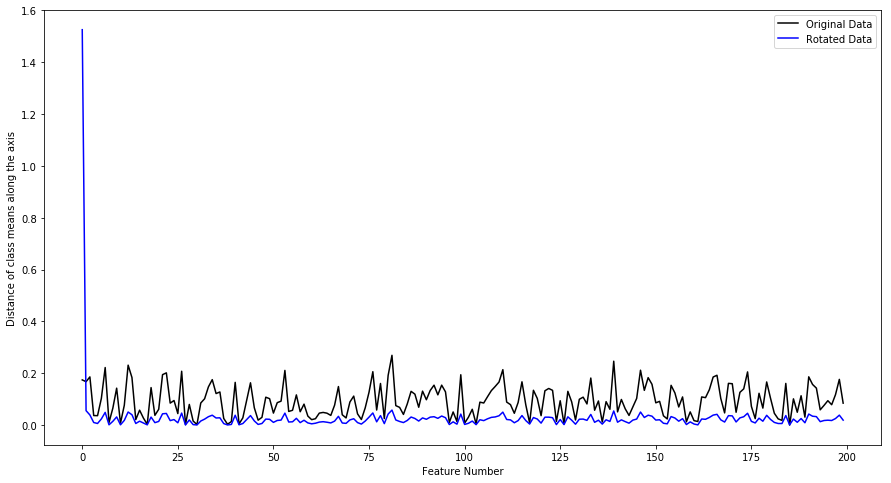

In [37]:
from sklearn.preprocessing import StandardScaler
train, target = train.iloc[:, 2:], train['target']

ss=StandardScaler()
ind0=target==0
train_scaled=ss.fit_transform(train)

x0m=train_scaled[ind0].mean(axis=0,keepdims=True)
x1m=train_scaled[~ind0].mean(axis=0,keepdims=True)
xm=np.r_[x0m,x1m]
L,s,R=np.linalg.svd(xm)
train_rotated=train_scaled @ R

plot_means(train_rotated,train_scaled)

In [45]:
df['target']=target

In [72]:
df2=pd.DataFrame(data_rotated)
df2_train=df2.iloc[0:200000,:]
df2_test=df2.iloc[200000:,:]

In [76]:
df2_train=df2_train.add_prefix('svd_')
df2_test=df2_test.add_prefix('svd_')

In [79]:
# df2_train.to_feather('../features/svd_train.feather')
# df2_test.to_feather('../features/svd_test.feather')
pd.DataFrame(df2_train.iloc[:,0]).to_feather('../features/svd_var0_train.feather')
pd.DataFrame(df2_test.iloc[:,0]).to_feather('../features/svd_var0_test.feather')

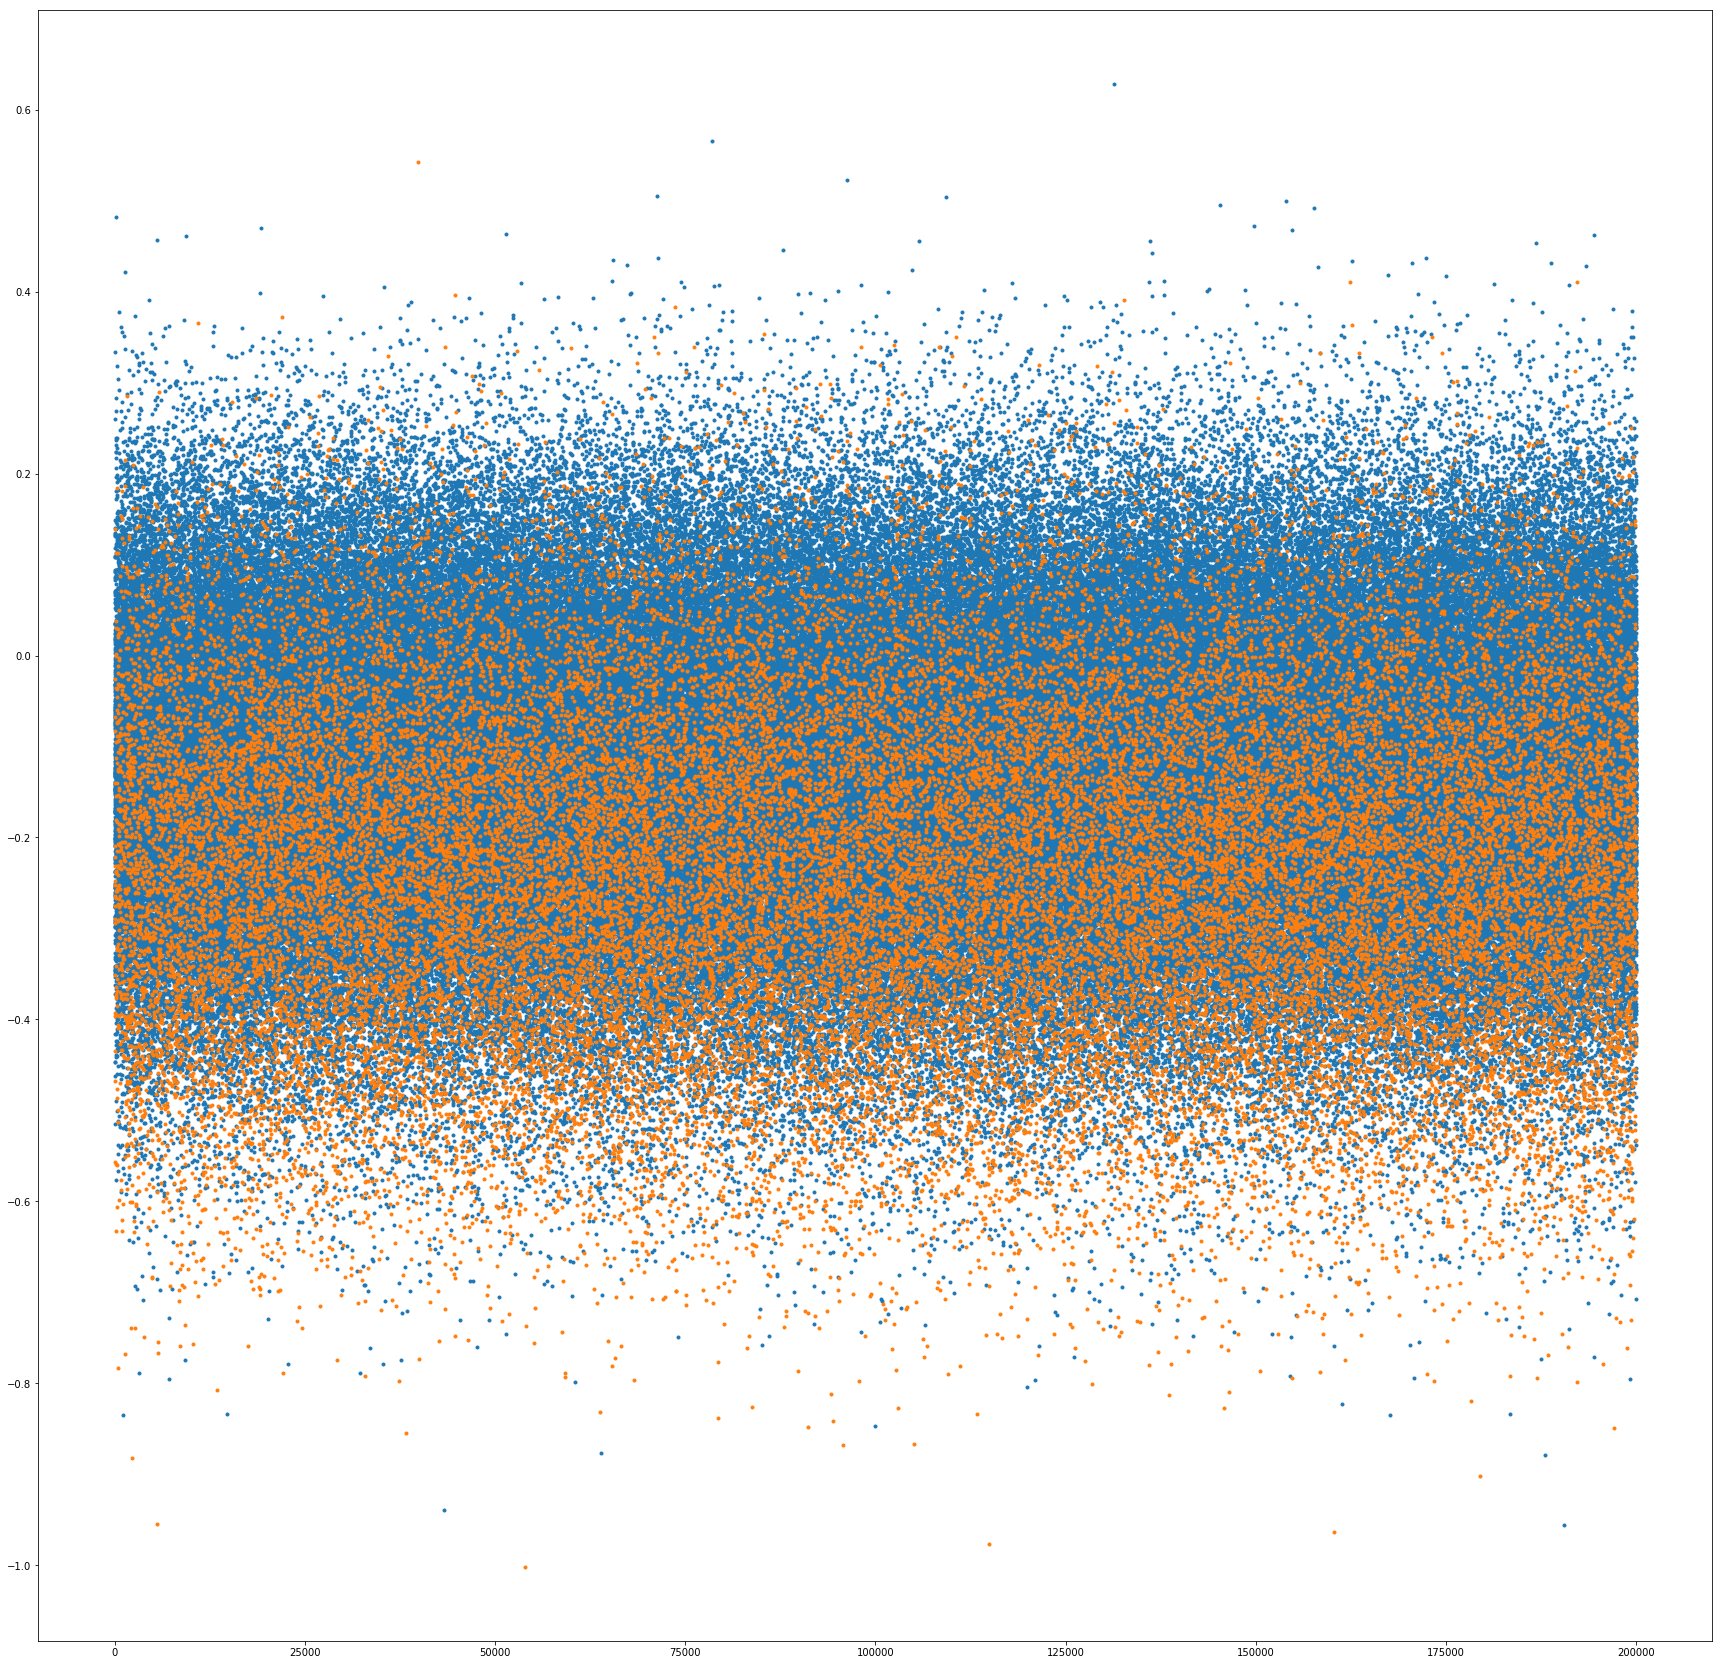

In [73]:
df2.loc[df['target']==0][0].plot(figsize=(30,30),style='.')
df2.loc[df['target']==1][0].plot(figsize=(30,30),style='.')

In [42]:
df=pd.DataFrame(train_rotated)

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.226307,0.197296,0.217744,-0.702657,0.071016,-0.494214,-0.423817,0.712021,-1.575440,-1.421583,...,0.305998,-1.243212,0.779789,-0.408006,0.124462,-1.773519,1.018888,-0.271230,-0.910064,0.211671
1,-2.175569,-1.289730,1.049864,-0.773694,0.801758,1.406690,0.015359,-0.025063,0.787803,0.567807,...,0.736747,-0.058081,0.621251,1.976186,-0.715170,1.475970,0.977531,-0.026118,0.992666,0.408257
2,-0.152292,-0.142732,0.400017,0.538544,-0.345198,-0.551485,1.657177,-0.545555,-1.592699,-1.235822,...,-0.149959,0.694013,-0.115226,-0.385339,1.179549,2.227228,-1.653759,-0.627631,-0.285479,0.318200
3,-1.250554,-1.184941,-0.664216,0.084399,1.003452,0.304316,0.384713,-0.531408,-1.885627,0.626151,...,0.099227,-0.953602,-0.684370,-0.434830,1.694534,-0.739381,-1.017781,1.528005,0.760401,-0.607458
4,-0.816427,2.711403,0.337672,0.154954,0.425182,1.007197,0.392223,0.984981,1.752449,0.222981,...,-1.005113,0.475013,-1.439102,1.489185,-1.563407,-1.343709,0.271516,0.865497,0.966484,-0.551604
5,-0.166220,0.079513,0.695527,0.919724,-0.094771,1.112787,-1.006539,-0.370639,0.994085,-1.290035,...,-2.069333,-0.277852,2.256488,-0.728978,-0.986103,0.797934,-1.080393,0.938062,-1.089408,-0.130354
6,-1.432360,0.793330,-0.697705,-1.201040,-0.040658,-0.417084,0.757798,-1.266659,-1.438972,0.383124,...,1.130601,-0.443202,1.149680,-0.757182,0.133688,0.390637,1.204393,0.322338,-1.520066,-0.035442
7,-0.071134,-0.879542,1.211876,0.466824,-1.538513,0.827151,0.417167,1.726860,1.466985,-0.361930,...,2.304985,-0.240398,1.296668,0.586573,1.579408,-0.188499,0.395625,0.532110,-2.450273,0.700646
8,0.556810,0.187680,1.604087,-0.616007,-1.244919,1.523093,-0.775368,-1.944548,-0.953680,1.018951,...,-0.200530,2.673150,-0.341025,-0.552574,-1.067947,-1.046614,-0.522022,-0.984059,0.915699,0.886739
9,-0.086094,0.835550,-0.620246,-0.657218,1.577792,-1.400744,0.824383,0.076406,-0.027284,0.280817,...,-0.538070,-0.320498,-0.640196,0.072504,-1.026157,0.451947,2.190476,-1.119715,0.063992,1.708116


In [41]:
ftr.read_dataframe('../features/big_diff_mean_test.feather').head()

,plus_diff_mean,minus_diff_mean
0,5.549846,4.213400
1,4.960984,4.242497
2,4.523837,4.489498
3,5.582431,5.289842
4,6.178343,5.319920


In [16]:
R.shape

(200, 200)

In [17]:
pd.DataFrame(R).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.111398,0.107045,0.118799,0.023507,0.023208,0.065871,0.141892,-0.006432,0.041643,-0.091019,...,0.119018,0.100179,-0.091131,-0.037656,-0.048561,0.060142,0.050198,-0.075065,-0.112695,0.054082
1,-0.001767,-0.002242,-0.006166,-0.000734,-0.003208,-0.001185,-0.002134,0.003102,-0.001331,0.007880,...,-0.003680,-0.001553,0.001966,0.001083,-0.002076,-0.000535,-0.001348,-0.002424,0.003419,-0.000463
2,-0.118171,-0.017359,0.987333,-0.002504,-0.002487,-0.007010,-0.015098,0.000702,-0.004435,0.009724,...,-0.012676,-0.010660,0.009701,0.004010,0.005150,-0.006397,-0.005345,0.007966,0.012002,-0.005753
3,-0.023434,-0.002954,-0.002509,0.999504,-0.000492,-0.001390,-0.002993,0.000138,-0.000879,0.001925,...,-0.002512,-0.002113,0.001923,0.000795,0.001022,-0.001268,-0.001059,0.001581,0.002378,-0.001141
4,-0.022875,-0.005374,-0.002464,-0.000486,0.999512,-0.001359,-0.002926,0.000142,-0.000861,0.001898,...,-0.002461,-0.002066,0.001881,0.000778,0.000993,-0.001239,-0.001037,0.001537,0.002330,-0.001114


In [18]:
reverse_list = [0,1,2,3,4,5,6,7,8,11,15,16,18,19,
                22,24,25,26,27,41,29,
                32,35,37,40,48,49,47,
                55,51,52,53,60,61,62,103,65,66,67,69,
                70,71,74,78,79,
                82,84,89,90,91,94,95,96,97,99,
                105,106,110,111,112,118,119,125,128,
                130,133,134,135,137,
                140,144,145,147,151,155,157,159,
                161,162,163,164,167,168,
                170,171,173,175,176,179,
                180,181,184,185,187,189,
                190,191,195,196,199]

In [20]:
train.iloc[:,reverse_list]*=-1

In [23]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [21]:
train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-8.9255,6.7863,-11.9081,-5.0930,-11.4607,9.2834,-5.1187,-18.6266,4.9200,5.7470,...,-4.4354,-3.9642,3.1364,1.6910,18.5227,2.3978,-7.8784,8.5635,12.7803,1.0914
1,-11.5006,4.1473,-13.8588,-5.3890,-12.3622,-7.0433,-5.6208,-16.5338,-3.1468,8.0851,...,-7.6421,-7.7214,2.5837,10.9516,15.4305,-2.0339,-8.1267,8.7889,18.3560,-1.9518
2,-8.6093,2.7457,-12.0805,-7.8928,-10.5825,9.0837,-6.9427,-14.6155,4.9193,5.9525,...,-2.9057,-9.7905,1.6704,1.6858,21.6042,-3.1417,6.5213,8.2675,14.7222,-0.3965
3,-11.0604,2.1518,-8.9522,-7.1957,-12.5846,1.8361,-5.8428,-14.9250,5.8609,8.2450,...,-4.4666,-4.7433,0.7178,1.4214,23.0347,1.2706,2.9275,10.2922,17.9697,8.9996
4,-9.8369,1.4834,-12.8746,-6.6375,-12.2772,-2.4486,-5.9405,-19.2514,-6.2654,7.6784,...,1.4905,-9.5214,-0.1508,9.1942,13.2876,1.5121,-3.9267,9.5031,17.9974,8.8104
5,-11.4763,2.3182,-12.6080,-8.6264,-10.9621,-3.5609,-4.5322,-15.2255,-3.5855,5.9790,...,6.3068,-6.6025,5.2912,0.4403,14.9452,-1.0314,3.6241,9.7670,12.5809,4.7602
6,-11.8091,0.0832,-9.3494,-4.2916,-11.1355,8.0198,-6.1961,-12.0771,4.3781,7.9232,...,-8.7830,-6.4521,3.5325,0.1777,18.3314,-0.5845,-9.1104,9.1143,10.8869,3.2097
7,-13.5580,7.9881,-13.8776,-7.5985,-8.6543,-0.8310,-5.6890,-22.3262,-5.0647,7.1971,...,-13.1700,-6.5491,3.9906,5.8061,23.1407,0.3776,-4.2178,9.4237,8.6624,-3.4806
8,-16.1071,-2.4426,-13.9307,-5.6327,-8.8014,-6.1630,-4.4514,-10.1854,3.1882,9.0827,...,-1.4298,-14.7510,1.6395,1.4181,14.8370,1.9940,1.0733,8.1975,19.5114,-4.8453
9,-12.5088,-1.9743,-8.8960,-5.4508,-13.6043,16.2859,-6.0637,-16.8410,-0.1287,7.9682,...,-0.5543,-6.3160,1.0371,3.6885,14.8344,-0.4467,-14.1287,7.9133,16.2375,-14.2514
